# Obligatorio de Análisis Predictivo de Series Temporales


## Conteo de vehículos

## Estudiantes: Felipe Bastarrica y Emiliano Espíndola


In [113]:
#install.packages("feasts")
#cargo bibliotecas
library(astsa)
library(forecast)
library(tsibble)
library(dplyr)

library(feasts)
#> Loading required package: fabletools
library(ggplot2)
#ajusto tamaño de gráficas
options(repr.plot.width=15, repr.plot.height=8)

In [34]:
# Datos extraidos de https://catalogodatos.gub.uy/dataset/intendencia-montevideo-conteo-de-vehiculos-del-centro-de-gestion-de-la-movilidad

# Carga de datos preprocesados - Son datos para la calle Sarmiento de rambla a 
# requena del 1-1-2017 al 31-12-2018 sumarizado en 3 detectores sin contar sabados y domingos.
df <- read.csv("/Users/felipebastarricaboghossian/obligatorio-bastarrica-espindola/volumen_Sarmiento_15_2017_092019.csv", )


In [164]:
head(df)
weekend_days = 0

# Frecuencia de muestreo por 15 min
freq = ((365-weekend_days)*24*60)/(3*5*52)

# Frecuencia por semana
#freq = (365-weekend_days)/(5)
freq

,date,volumen15
,<chr>,<int>
1,1/1/17 00:00,16
2,1/1/17 00:15,31
3,1/1/17 00:30,37
4,1/1/17 00:45,33
5,1/1/17 01:00,76
6,1/1/17 01:15,119


[1] 673.8462

In [165]:
# Definición de Time Series (no se coloca la referencia en 2017 por ahora)
df_ts = ts(df$volumen15, frequency=freq, start=c(2017,1))

[1] 82.34276

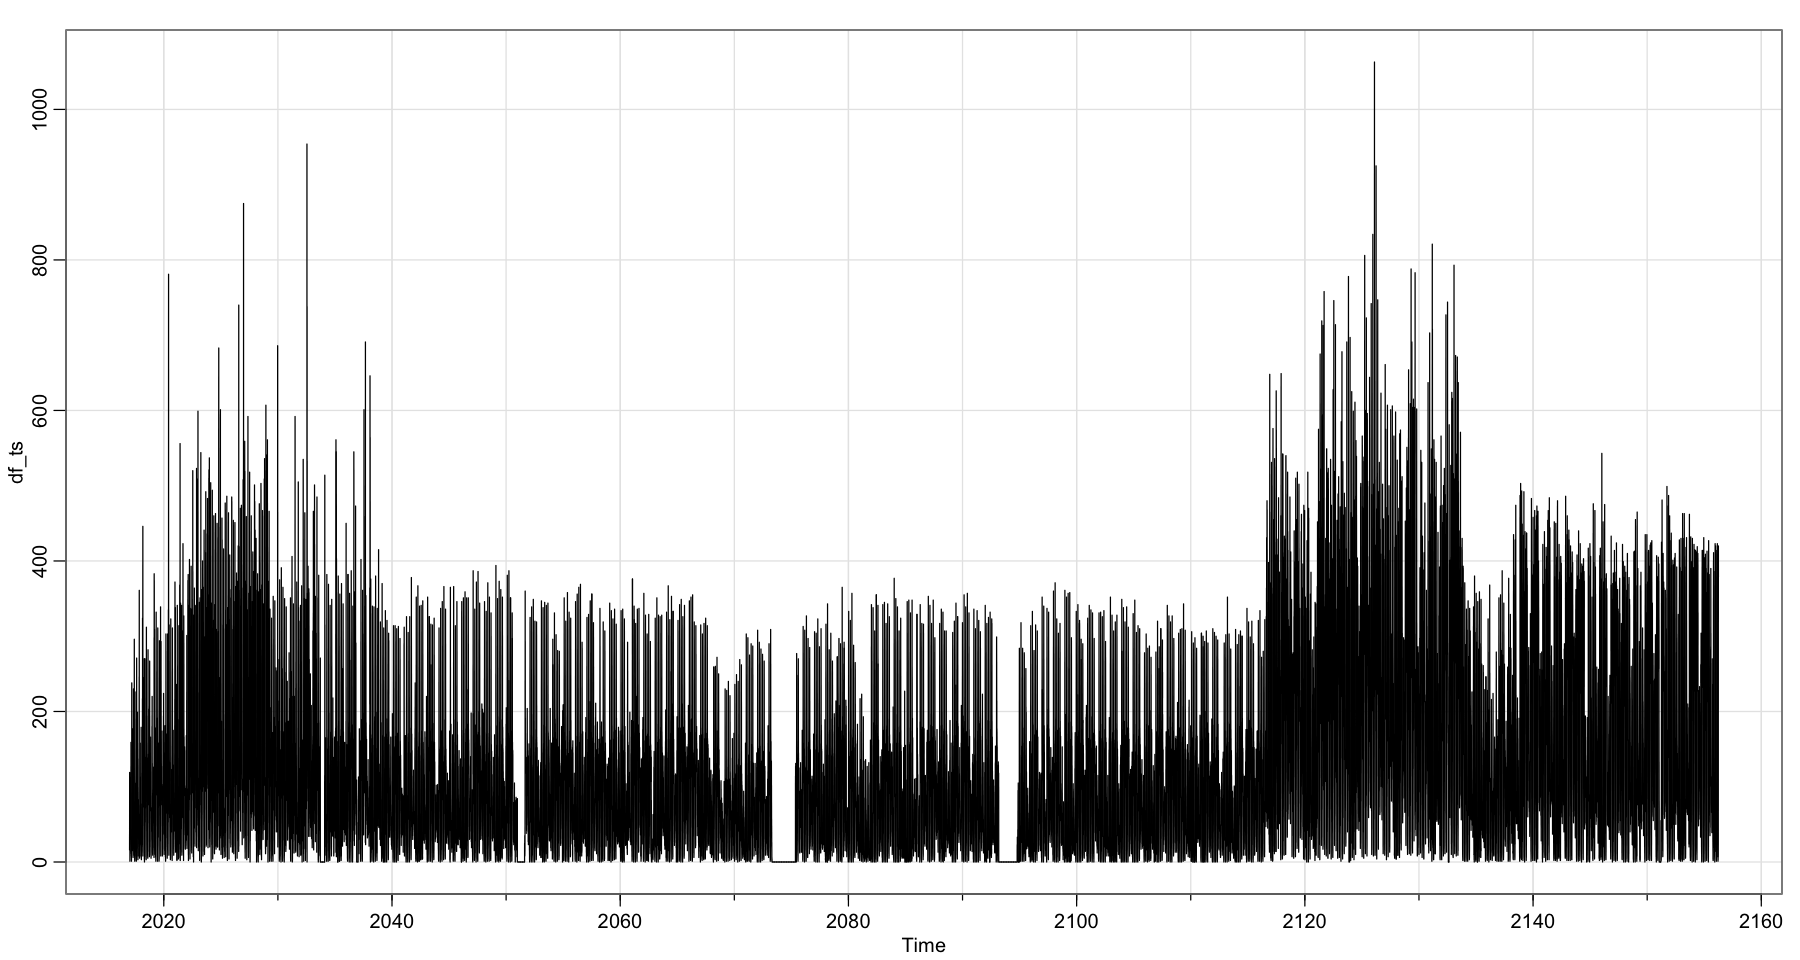

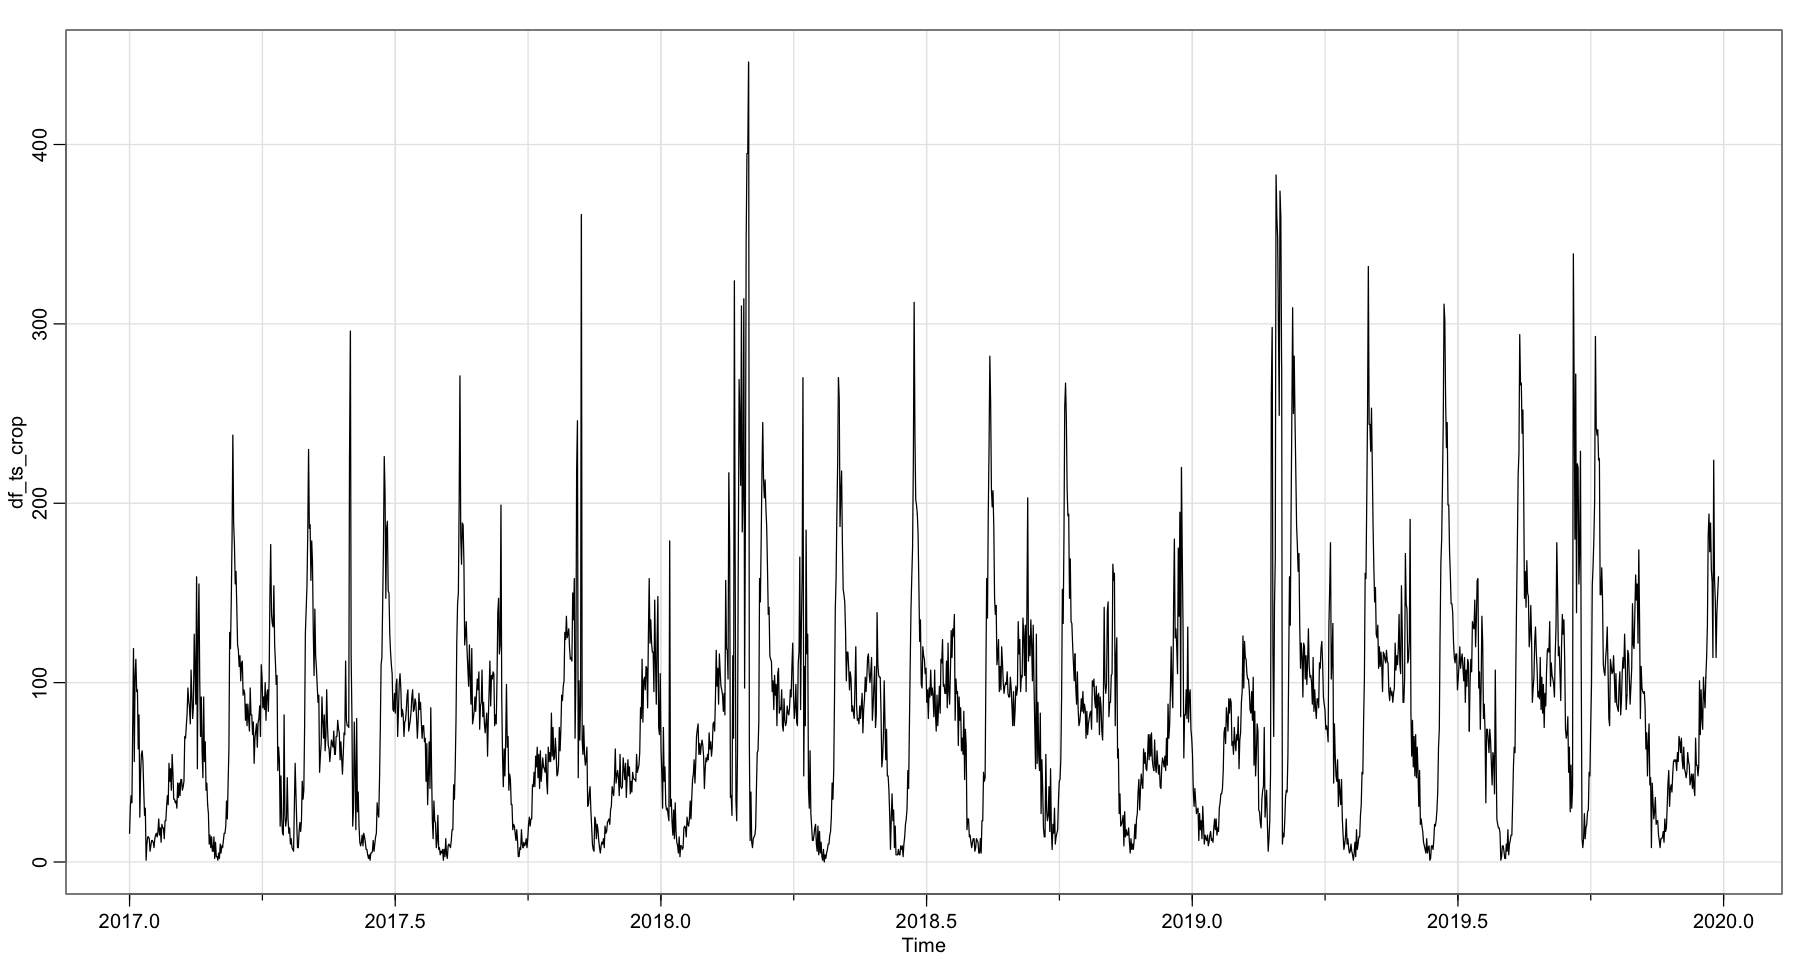

In [166]:
# Plot de la TS
tsplot(df_ts)

# Días a tomar para análisis más pequeño
days_to_crop = 21

# Muestras por día (4 muestras cada 15 minutos x 24)
samples_per_day = 96

# Serie recortada
df_ts_crop = head(df_ts, samples_per_day*days_to_crop)

# Promedio de serie cortada
mean(df_ts_crop)

# Plot de la serie cortada
tsplot(df_ts_crop)


In [172]:
df_aggregate = aggregate(df_ts, nfrequency = freq, FUN = sum)
df_aggregate_ts = ts(df_aggregate, frequency=freq, start=c(2017,1))
#tsplot(df_aggregate_ts)

df_aggregate_ts_croped = head(df_aggregate_ts, (96*7+2)*5)
#length(df_aggregate_ts_croped)
#time(df_aggregate_ts_croped)

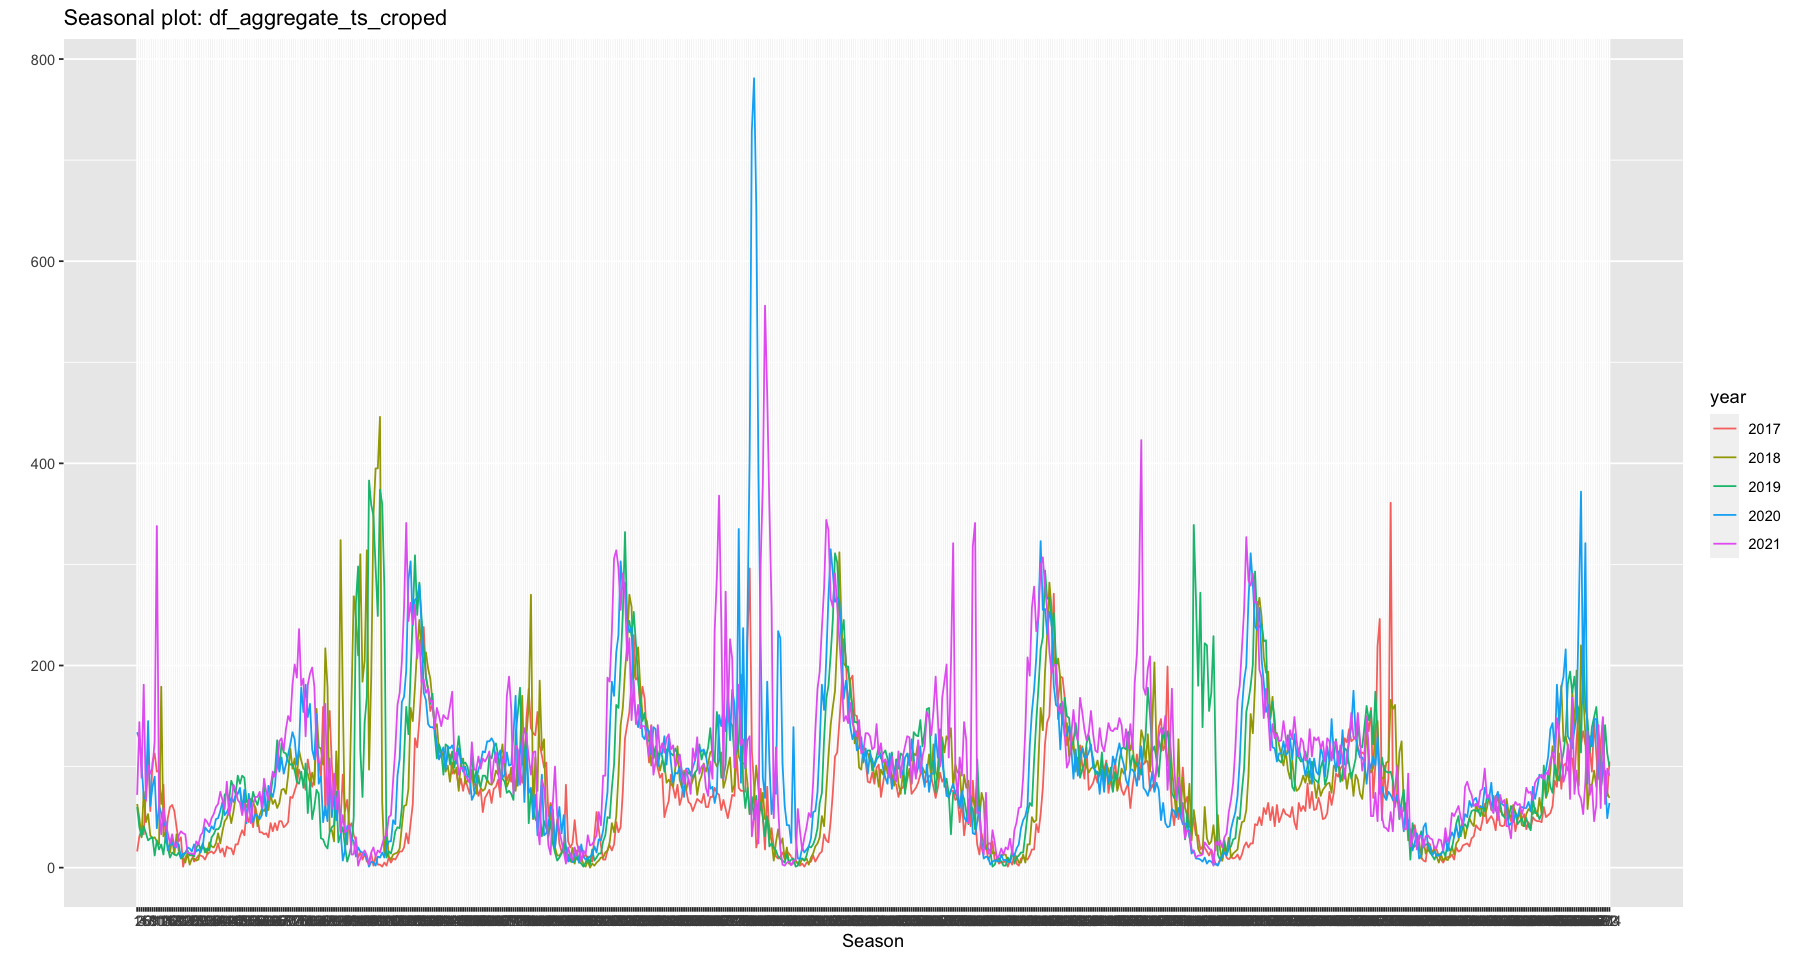

In [173]:
ggseasonplot(df_aggregate_ts_croped)

In [169]:
gg_season(df_aggregate_ts_croped)# , period = "week"

ERROR: Error in UseMethod("measured_vars"): no applicable method for 'measured_vars' applied to an object of class "ts"


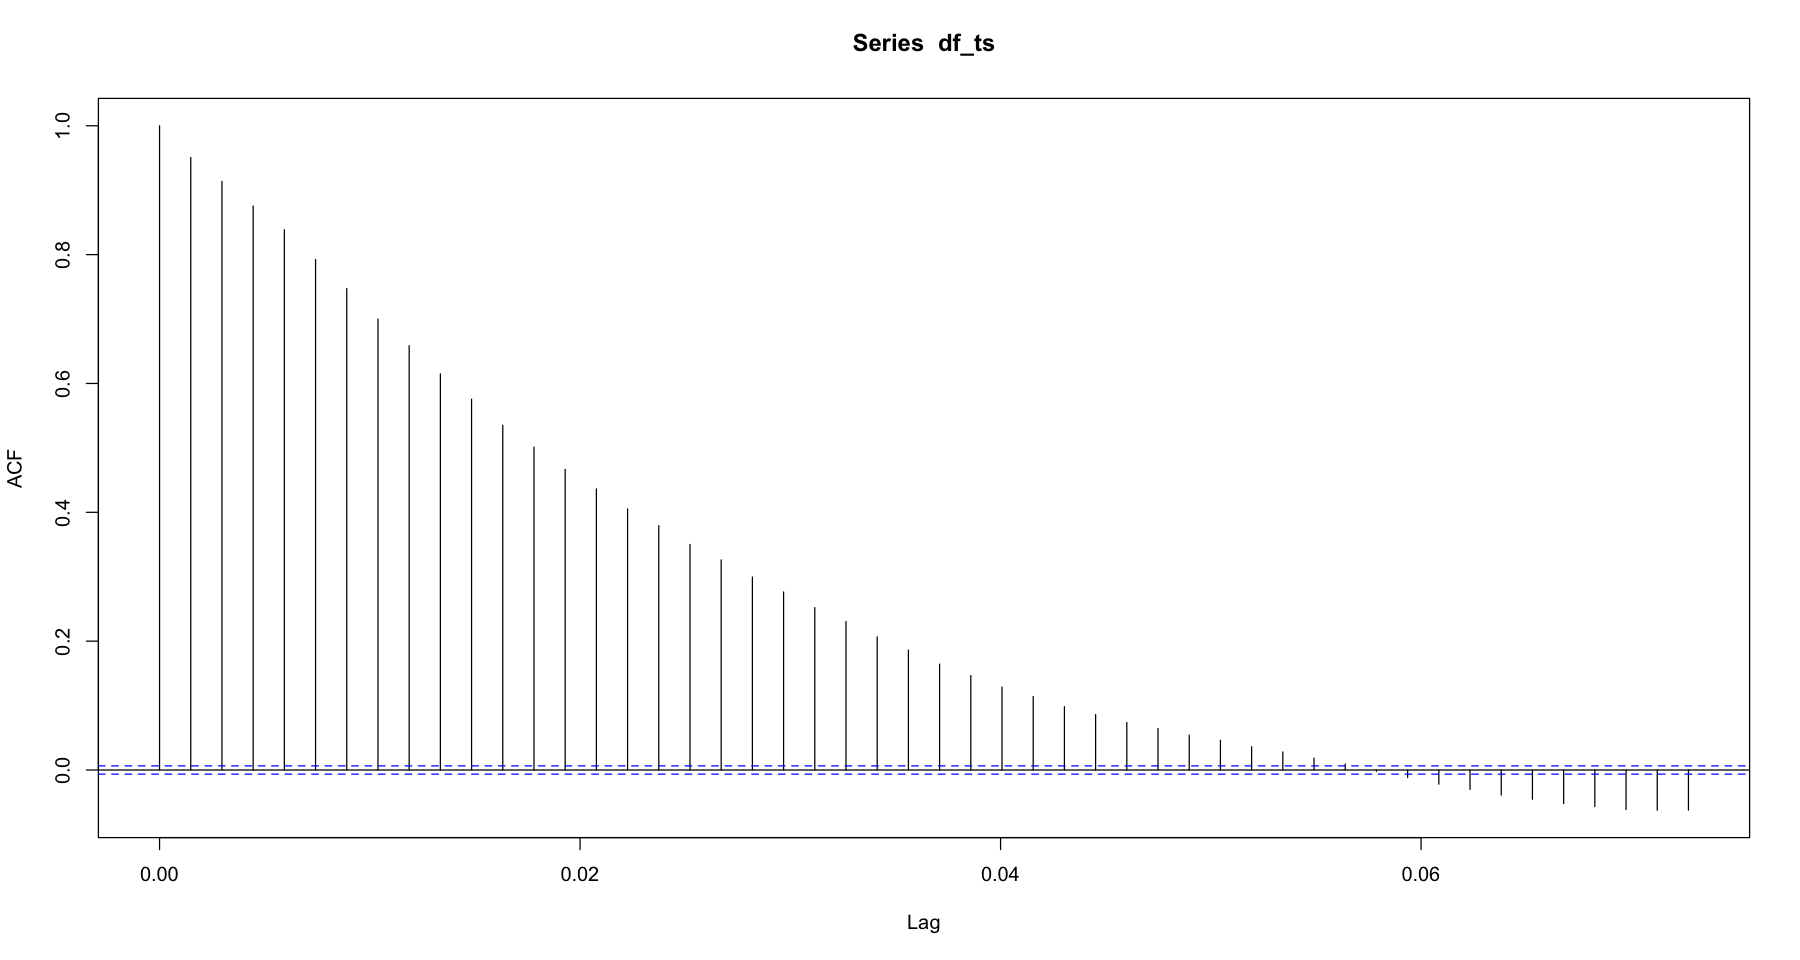

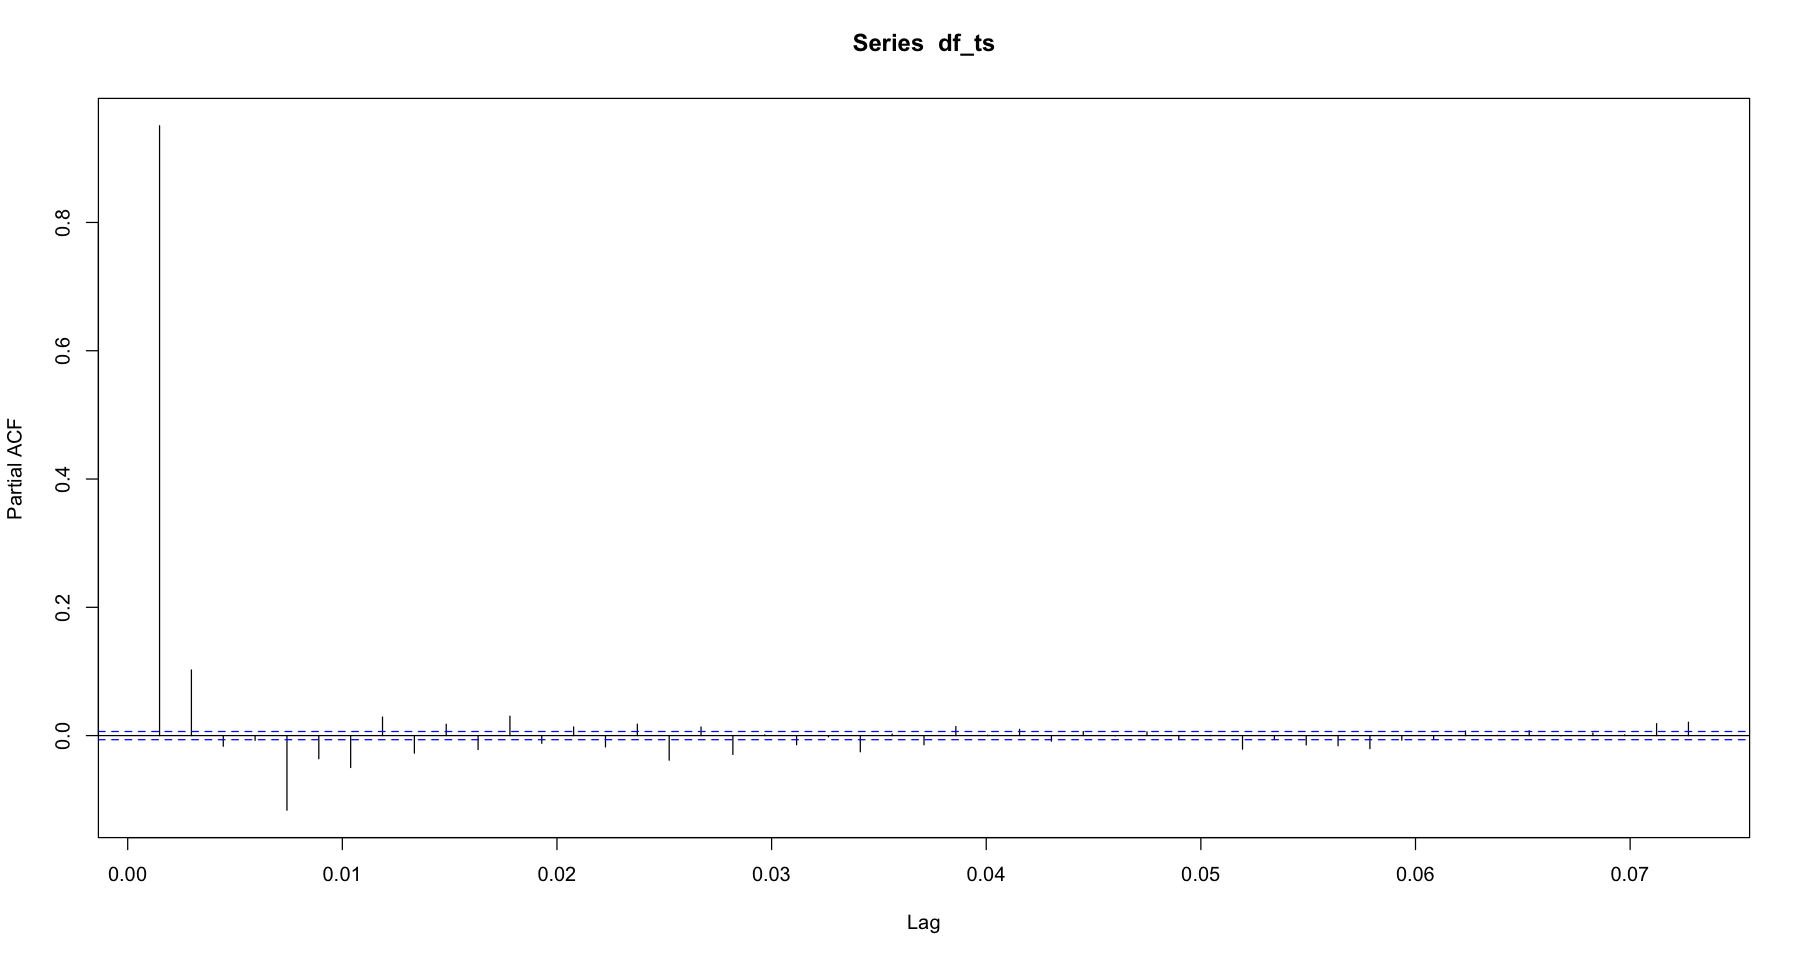

In [86]:
acf(df_ts)
pacf(df_ts)

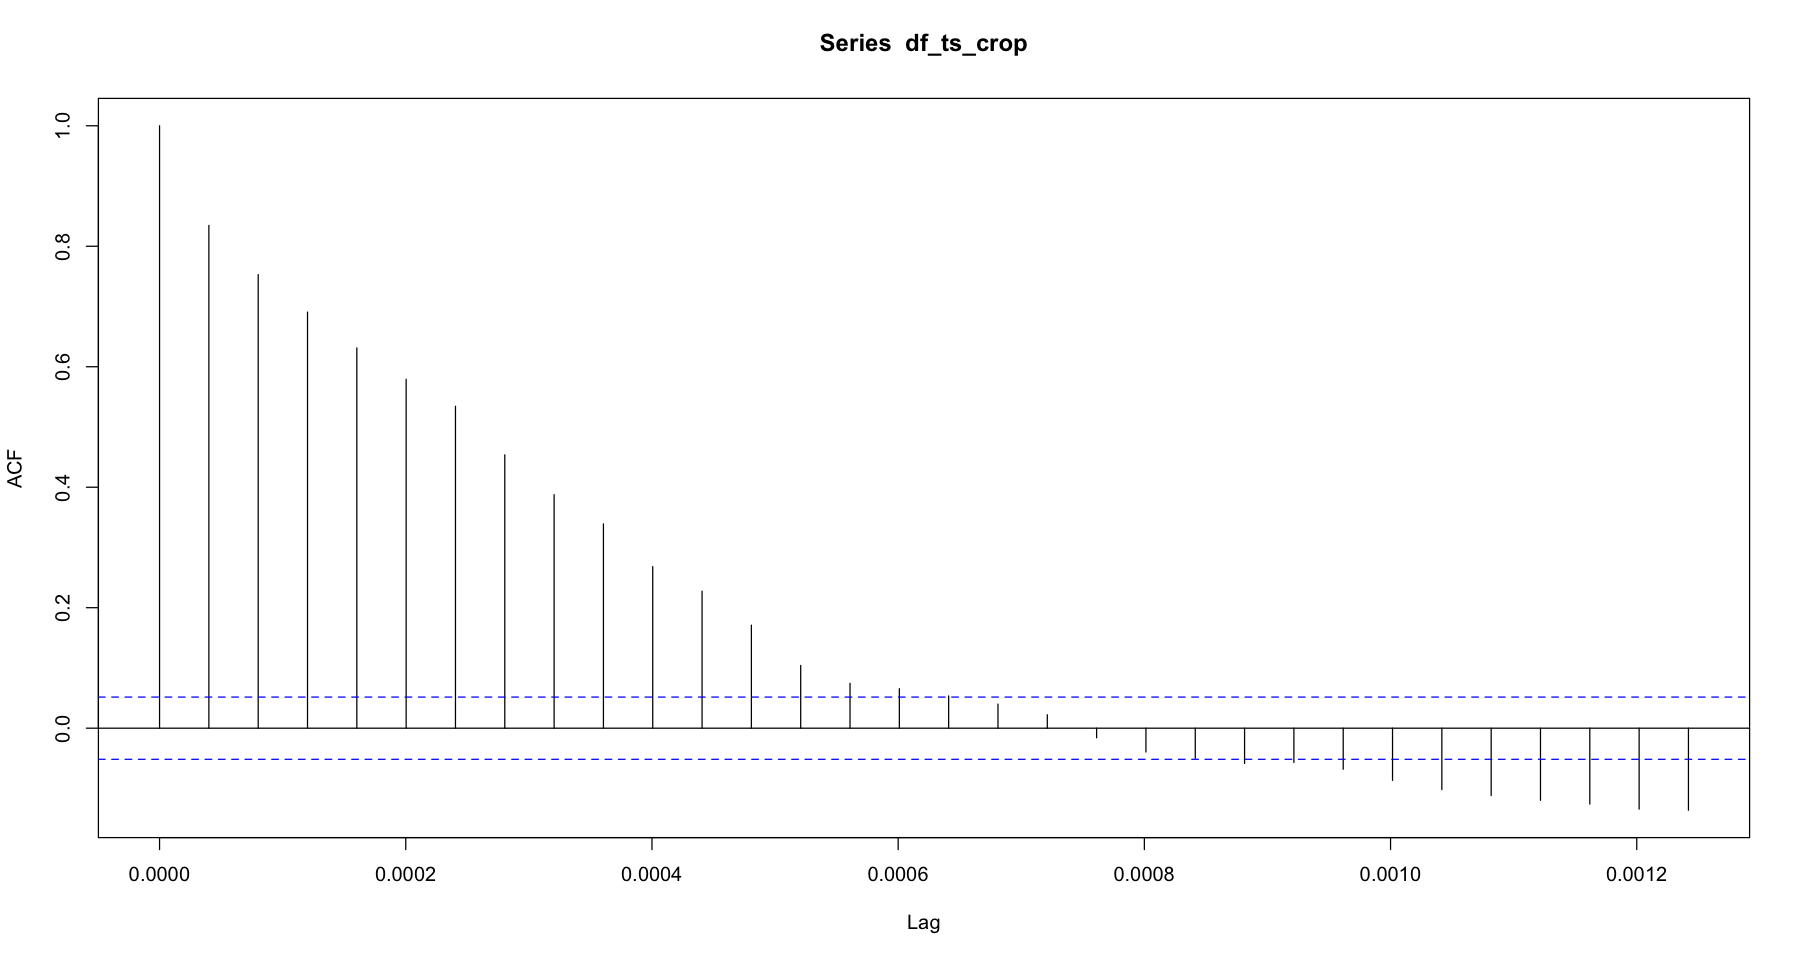

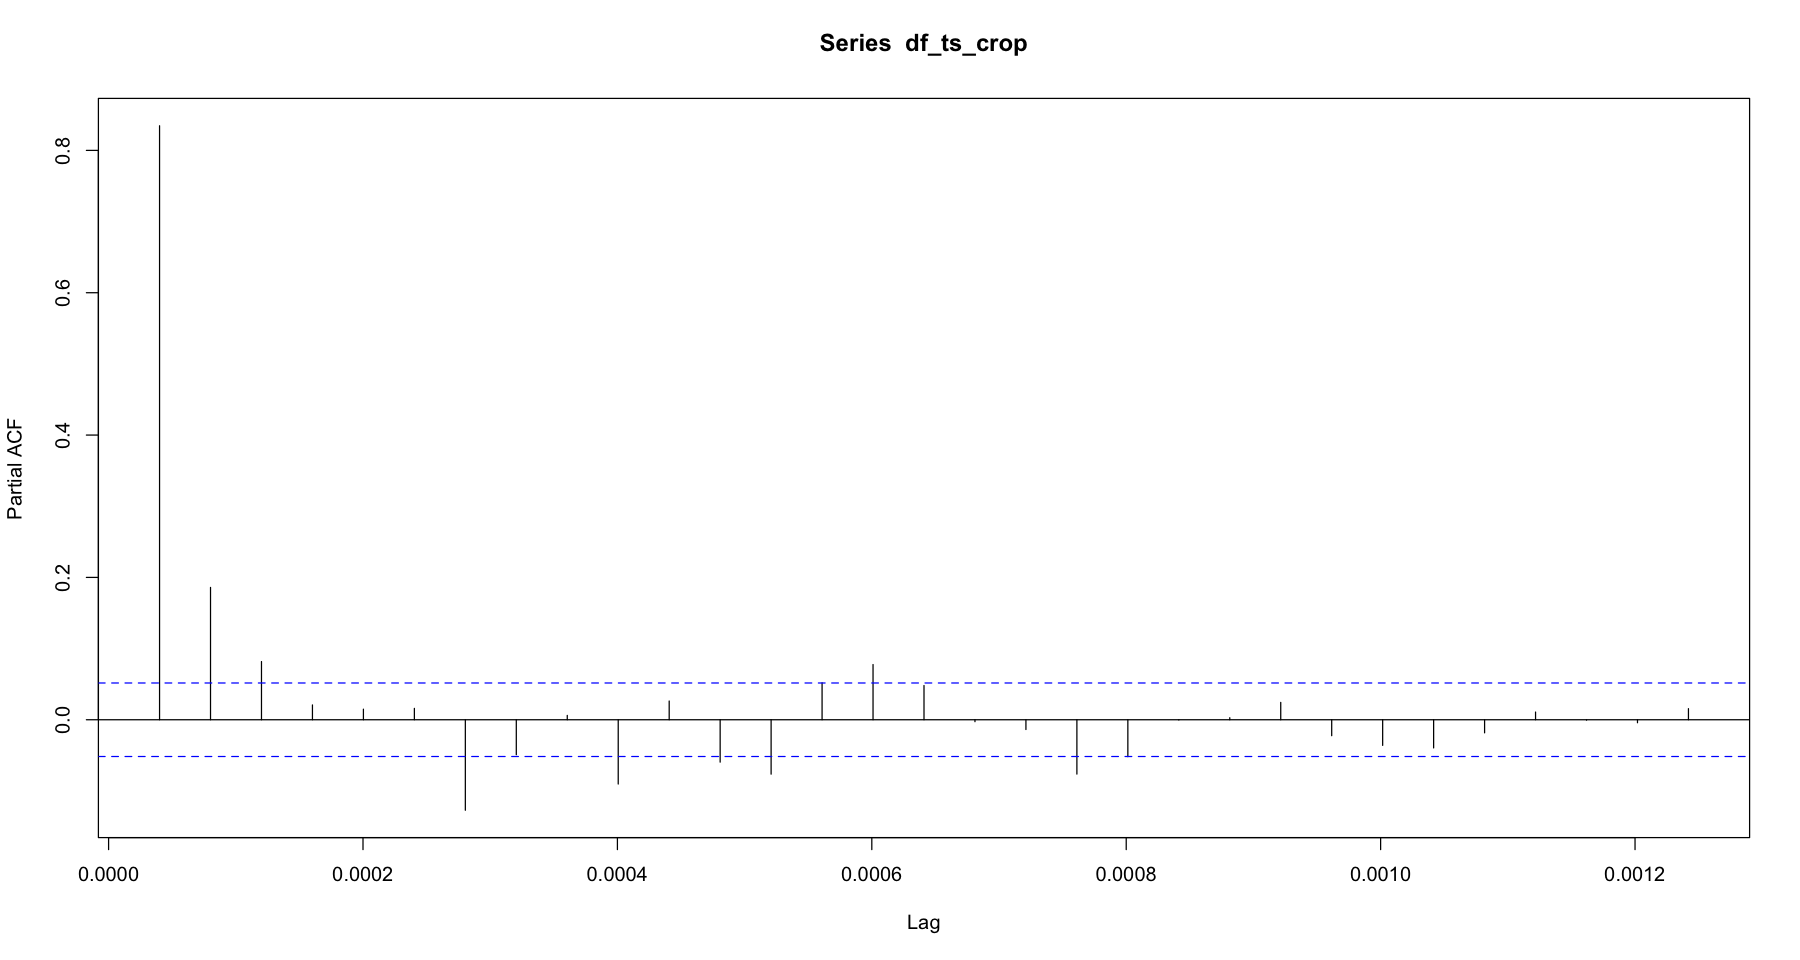

In [7]:
acf(df_ts_crop)
pacf(df_ts_crop)

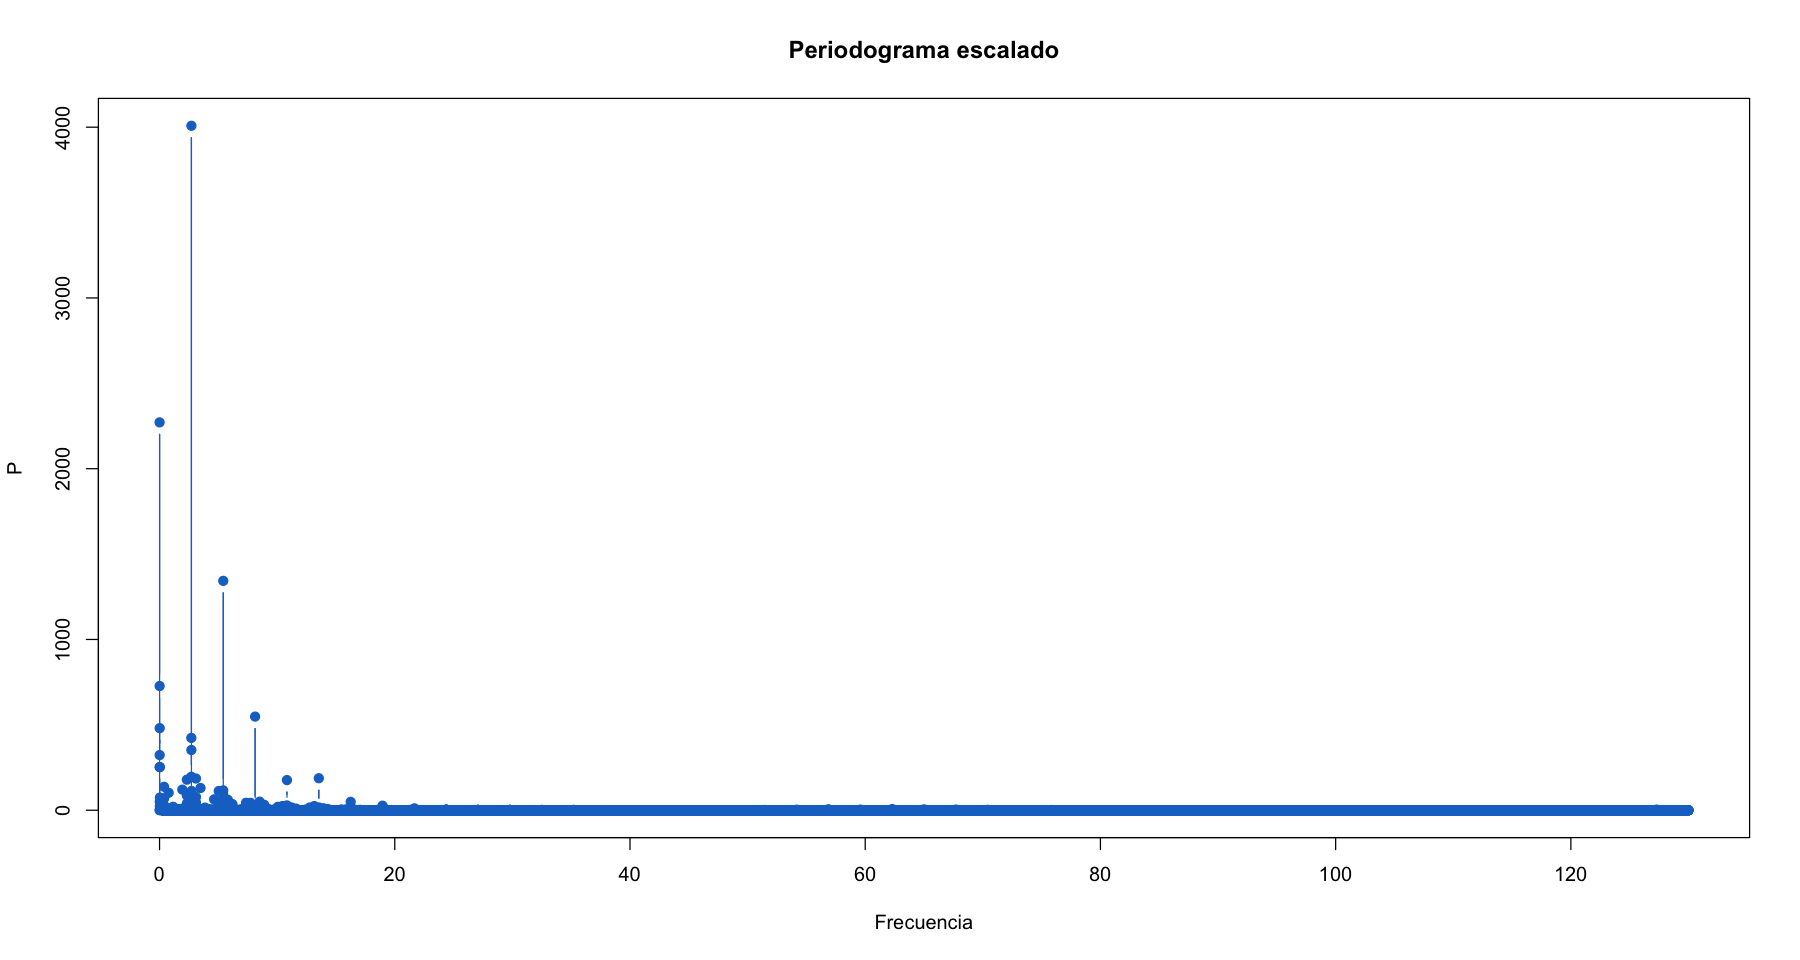

In [8]:
# Estudio de la periodicidad 
freq_periodograma = (24*60)/(3*5) # 24 horas * 60 minutos es la granularidad de minutos por día * 5 minutos por muestra agregado en 3 muestras 
s = df_ts
s = s-mean(s) # Se quita la media
n = length(s)
I = abs(fft(s))^2 #FFT y módulo cuadrado
I = I[1:floor(n/2)] #Recorto el vector a las frecuencias observables
P = (4/n^2)*I #Escalado del periodograma
f = (0:(n/2-1))/n*freq/96 #Vector de frecuencias para hacer el gráfico (se multiplica por la frecuencia de la serie, para normalizar

#Ploteo del periodograma
plot(f, P, type="b", xlab="Frecuencia", main="Periodograma escalado", col=4, lwd=1, pch=19)

In [9]:
# Primera frecuencia de mayor importancia
f1 = f[which.max(P)]*samples_per_day
f1

# Segunda frecuencia de mayor importancia
P[which.max(P)] = 0
f2 = f[which.max(P)]*samples_per_day
f2

# Tercera frecuencia de mayor importancia
P[which.max(P)] = 0
f3 = f[which.max(P)]*samples_per_day
f3

# Cuarta frecuencia de mayor importancia
P[which.max(P)] = 0
f4 = f[which.max(P)]*samples_per_day
f4

# Quinta frecuencia de mayor importancia
P[which.max(P)] = 0
f5 = f[which.max(P)]*samples_per_day
f5

[1] 260

[1] 0.3058824

[1] 520

[1] 0.6117647

[1] 780


Call:
lm(formula = df_ts_crop ~ t + cos(2 * pi * f1 * t) + sin(2 * 
    pi * f1 * t) + cos(2 * pi * f3 * t) + sin(2 * pi * f3 * t) + 
    cos(2 * pi * f5 * t) + sin(2 * pi * f5 * t))

Residuals:
    Min      1Q  Median      3Q     Max 
-101.76  -22.65   -6.62   14.65  431.02 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -4.803e+05  1.531e+05  -3.138  0.00174 ** 
t                     2.382e+02  7.589e+01   3.138  0.00174 ** 
cos(2 * pi * f1 * t) -1.185e+01  1.784e+00  -6.641 4.41e-11 ***
sin(2 * pi * f1 * t) -2.155e+01  1.787e+00 -12.060  < 2e-16 ***
cos(2 * pi * f3 * t)  1.040e+01  1.784e+00   5.829 6.87e-09 ***
sin(2 * pi * f3 * t) -3.095e+01  1.785e+00 -17.341  < 2e-16 ***
cos(2 * pi * f5 * t)  3.384e+00  1.784e+00   1.897  0.05808 .  
sin(2 * pi * f5 * t)  1.043e+01  1.784e+00   5.843 6.34e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 47.88 on 1432 degrees of freedom
Multi

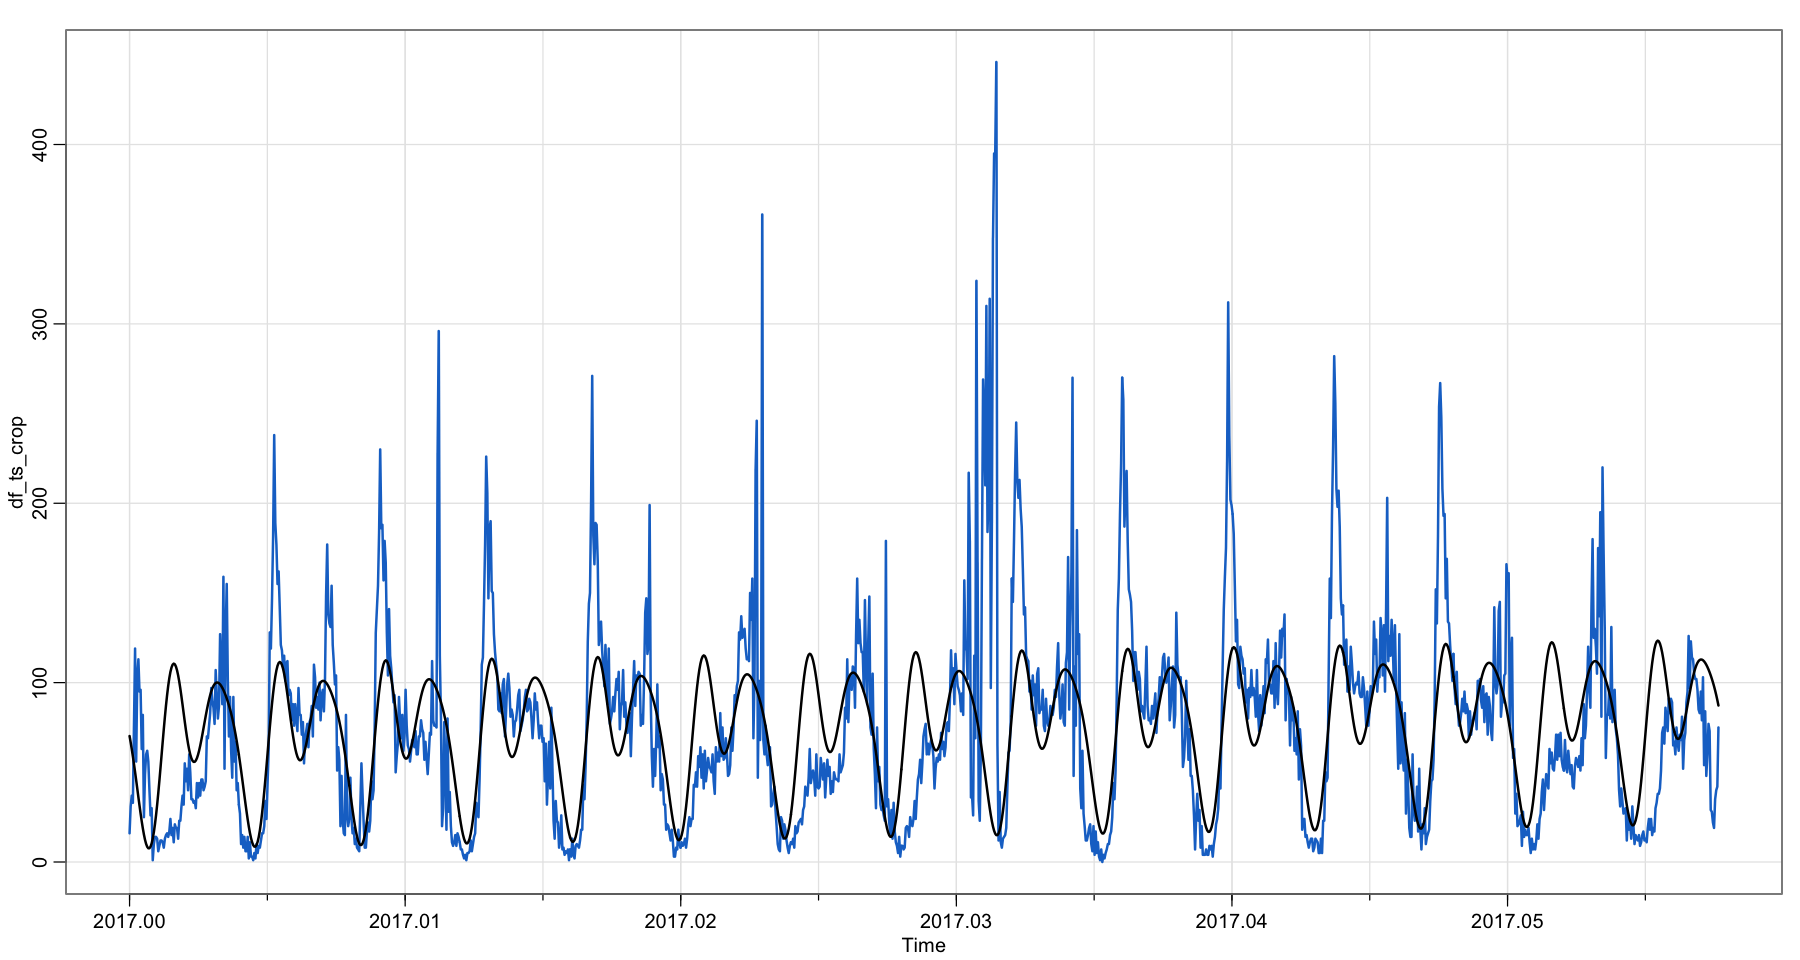

In [10]:
t = time(df_ts_crop)

# Creación de fit con las 3 frecuencias halladas
fit_df_ts_crop = lm(df_ts_crop ~ t + cos(2*pi*f1*t)+sin(2*pi*f1*t)+cos(2*pi*f3*t)+sin(2*pi*f3*t)+cos(2*pi*f5*t)+sin(2*pi*f5*t))

summary(fit_df_ts_crop)

adjustment_fit_df_ts_crop = ts(fitted(fit_df_ts_crop), start=2017, freq=freq)
tsplot(df_ts_crop, col=4, lwd=2)
lines(adjustment_fit_df_ts_crop, lwd=2)

# Residuals del ajuste
residuals_fit = residuals(fit_df_ts_crop)

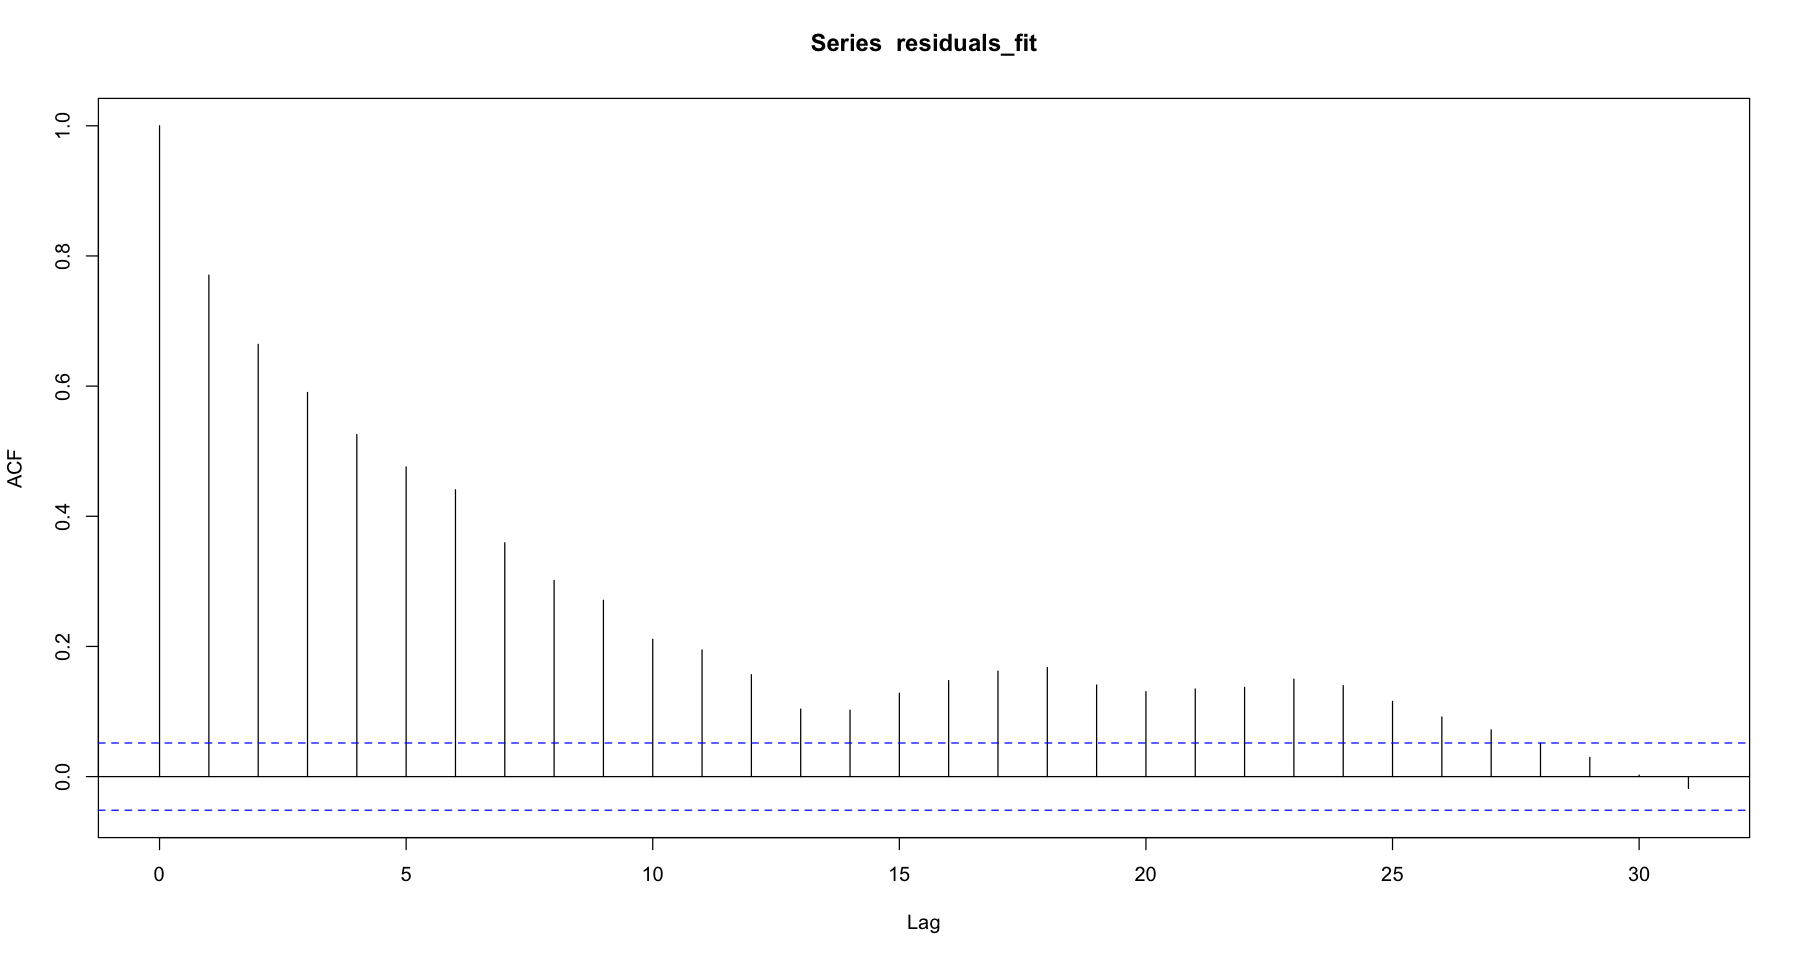

In [11]:
acf(residuals_fit)

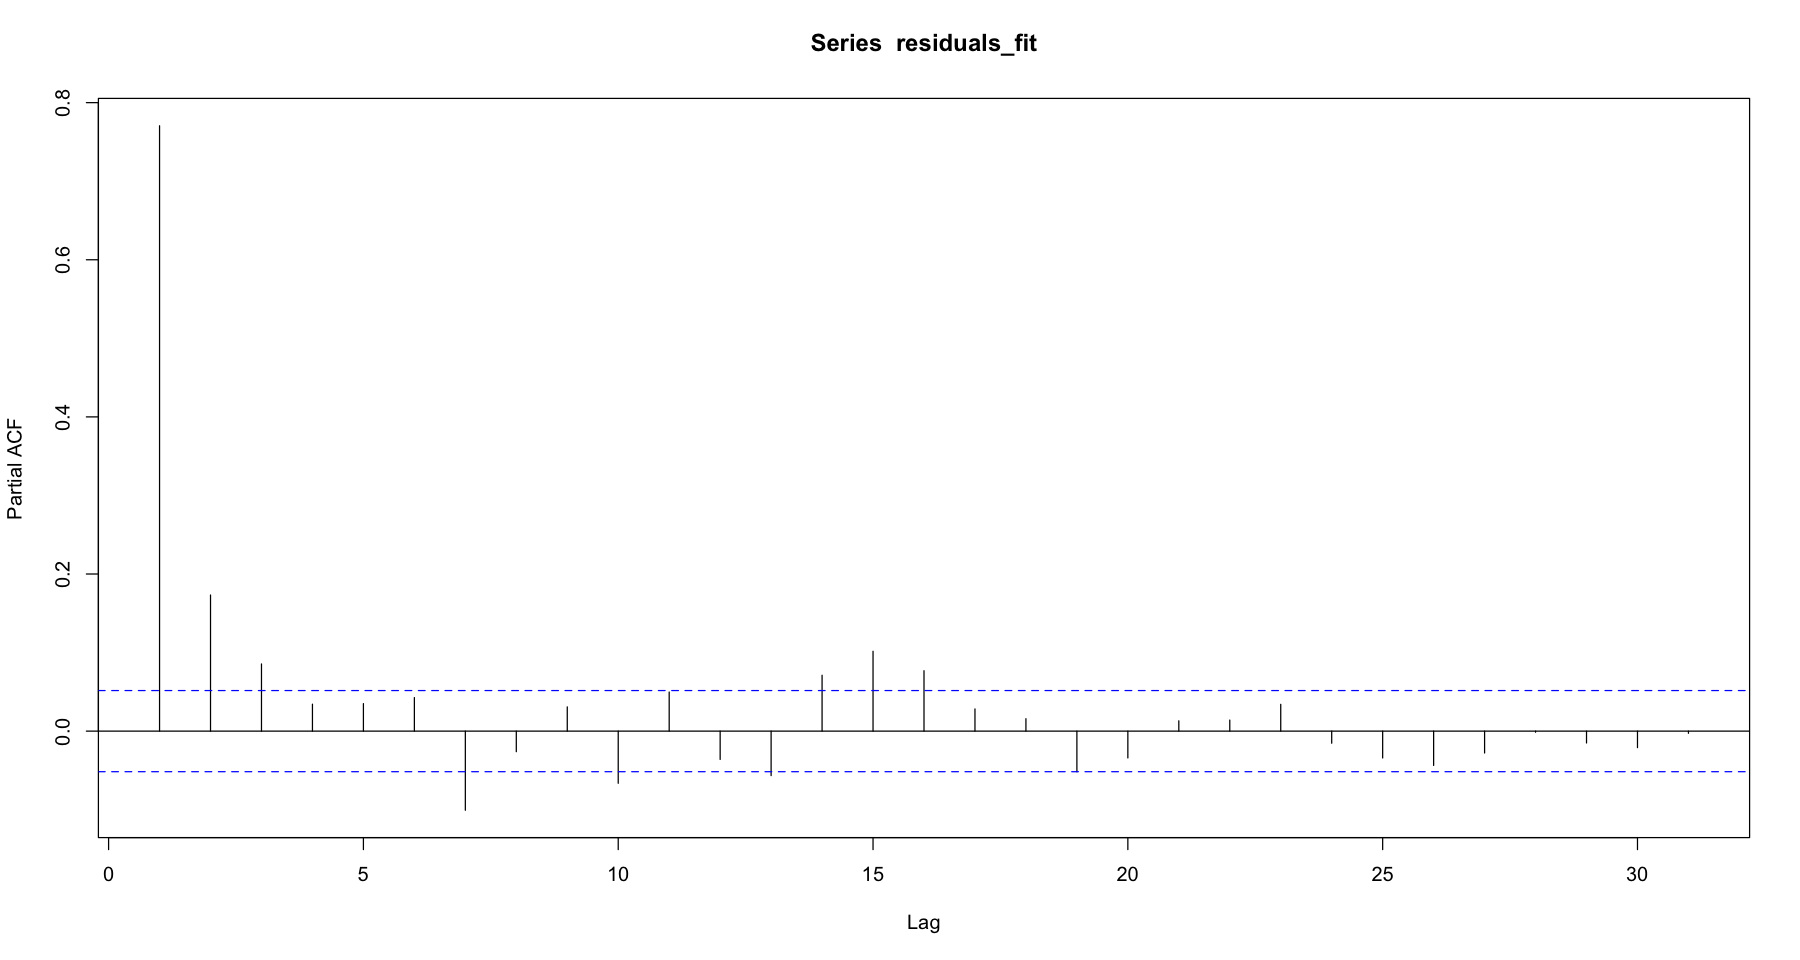

In [12]:
pacf(residuals_fit)

In [13]:
# Ajuste de ARIMA de AR 2 con Season 1
arima_fit = Arima(df_ts, order=c(2,0,0), seasonal = c(1,0,0), include.mean = FALSE)
summary(arima_fit)
residuals_arima_fit = residuals(arima_fit)
ajuste_arima = ts(fitted(arima_fit), start=0, freq=freq)

ERROR: Error in makeARIMA(trarma[[1L]], trarma[[2L]], Delta, kappa, SSinit): maximum supported lag is 350


In [ ]:
acf(residuals_arima_fit)
pacf(residuals_arima_fit)
checkresiduals(residuals_arima_fit)

In [ ]:
# Auto ARIMA con Seasonal
autoarima = auto.arima(df_ts, seasonal = TRUE)
ajuste_autoarima = ts(fitted(autoarima), start=0, freq=freq)
summary(autoarima)
residuals_autoarima = residuals(autoarima)

In [ ]:
acf(residuals_autoarima)
pacf(residuals_autoarima)